In [1]:
#%matplotlib notebook

#load dependencies
import json
import requests
from matplotlib import pyplot as plt
from scipy.stats import linregress
from pprint import pprint
import pandas as pd
import scipy.stats as st

In [2]:
# read in files
data = pd.read_csv('Clean_Data_Output/Clean_Data_Final.csv')
home_values = pd.read_csv('Resources/median_house_value.csv')
income = pd.read_csv('Clean_Data_Output/Data.csv')
poverty = pd.read_csv('Resources/PovertyReport.csv')

# merge csv files
property_df = pd.merge(data, home_values, on='State', how='outer')
property_df = pd.merge(property_df, income, on='State', how='outer')
property_df = pd.merge(property_df, poverty, on='State', how='outer')

# check the file has been read in
property_df.head()

,Unnamed: 0_x,State,Total Murders (2019)_x,2019 Population_x,Murders Per Capita/Homicide Rate,Unemployment Rate,Abbreviation,Average FICO Score,Median Home Value,Average Outstanding Mortgage Amount,Difference Between Value and Mortgage Balance,,Unnamed: 0_y,Median Income (2019),2019 Population_y,Population (2019),Total Murders (2019)_y,Poverty Rate
0,45.0,Vermont,11.0,623989.0,0.00002,2.3,VT,726.0,210600.0,147241.0,63359.0,,45.0,74305.0,8535519.0,8535519.0,11.0,10.1
1,44.0,Utah,66.0,3205958.0,0.00002,2.3,UT,716.0,351100.0,216213.0,134887.0,,44.0,84523.0,623989.0,623989.0,66.0,8.8
2,40.0,South Carolina,445.0,5148714.0,0.00009,2.3,SC,681.0,170700.0,160059.0,10641.0,,40.0,62028.0,884659.0,884659.0,445.0,13.9
3,34.0,North Dakota,26.0,762062.0,0.00003,2.4,ND,727.0,210000.0,162774.0,47226.0,NaN,34.0,70031.0,11689100.0,11689100.0,26.0,10.5
4,5.0,Colorado,209.0,5758736.0,0.00004,2.5,CO,718.0,381300.0,259113.0,122187.0,,5.0,72499.0,3565287.0,3565287.0,209.0,9.4


In [3]:
# clean dataframe with only the relevant data
data_df = property_df[['State', '2019 Population_x', 'Median Income (2019)', 'Median Home Value','Unemployment Rate', 'Poverty Rate',
                        'Total Murders (2019)_y', 'Murders Per Capita/Homicide Rate']]

data_df = data_df.rename(columns={'2019 Population_x':'Total Population', 'Median Income (2019)':'Median Income', 
                                 'Total Murders (2019)_y':'Total Murders', 'Murders Per Capita/Homicide Rate':'Homicide Rate'})
# drop na
data_df = data_df.dropna(how='any')

# sort by highest homicide rate descending
data_df = data_df.sort_values(by='Homicide Rate', ascending=False)

# check for errors
data_df.head()

,State,Total Population,Median Income,Median Home Value,Unemployment Rate,Poverty Rate,Total Murders,Homicide Rate
48,District of Columbia,705749.0,93111.0,567800.0,5.3,14.1,166.0,0.00024
46,Louisiana,4648794.0,51707.0,147600.0,4.9,18.8,522.0,0.00011
50,Alaska,731545.0,78394.0,326000.0,6.0,10.2,69.0,0.00009
28,Maryland,6045680.0,95572.0,290500.0,3.5,9.1,551.0,0.00009
21,Missouri,6137428.0,60597.0,163700.0,3.3,12.9,566.0,0.00009


The correlation coefficient between the two factors is 0.049
The r-squared is: 0.0023795858008970167


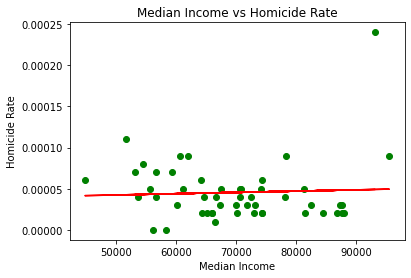

<Figure size 432x288 with 0 Axes>

In [4]:
# create scatter plot for median income and homicide rate

# plot lineregress
x_values = data_df['Median Income']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Median Income')
plt.ylabel('Homicide Rate')
plt.title('Median Income vs Homicide Rate')

# print r-valaue and show plot
corr = st.pearsonr(x_values,y_values)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save fig as output
plt.savefig('Image Output/median_income_cd')


The correlation coefficient between the two factors is 0.143
The r-squared is: 0.020438602664923856


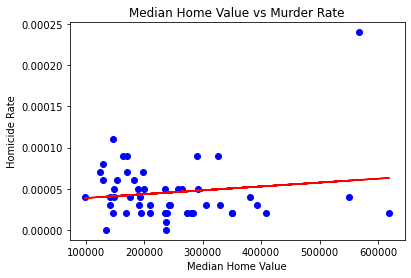

<Figure size 432x288 with 0 Axes>

In [5]:
# create scatter plot for median home value and homicide rate

# plot lineregress
x_values = data_df['Median Home Value']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Median Home Value')
plt.ylabel('Homicide Rate')
plt.title('Median Home Value vs Murder Rate')

# print r-valaue and correlation
corr = st.pearsonr(x_values,y_values)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")

# show plot
plt.show()

# save fig as output
plt.savefig('Image Output/home_value_cd')

The correlation coefficient between the two factors is 0.388
The r-squared is: 0.1508169573224734


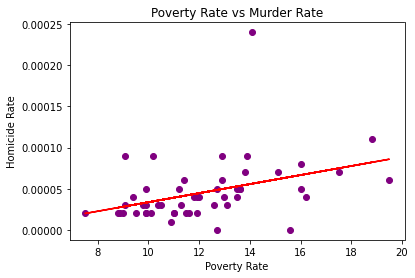

In [6]:
# create scatter plot for poverty rate and homicide rate

# plot lineregress
x_values = data_df['Poverty Rate']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='purple')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('Homicide Rate')
plt.title('Poverty Rate vs Murder Rate')

# print r-valaue and correlation
corr = st.pearsonr(x_values,y_values)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")

# show plot
plt.show()

# save fig as output
#plt.savefig('Image Output/home_value_cd')

The correlation coefficient between the two factors is 0.502
The r-squared is: 0.25247547300263684


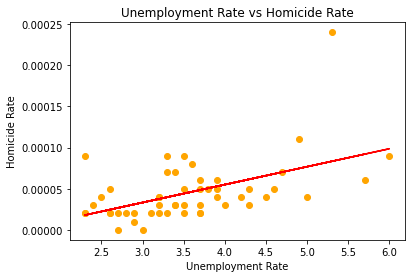

In [7]:
# create scatter plot for unemployment rate and murder rate

# plot lineregress
x_values = data_df['Unemployment Rate']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='orange')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('Homicide Rate')
plt.title('Unemployment Rate vs Homicide Rate')

# print r-valaue and show plot
unemployment = data_df['Unemployment Rate']
homicide_rate = data_df['Homicide Rate']
corr = st.pearsonr(unemployment, homicide_rate)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")

# show plot
plt.show()

# save fig as output
#plt.savefig('Image Output/unemployment_rate_cd')


In [8]:
abbrev_list = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI',
              'ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI',
              'MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
              'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
              'VA','WA','WV','WI','WY']

In [9]:
# set new dataframe for bar plots
unemploy_homicide_df = data_df[['State', 'Unemployment Rate', 'Total Murders']]
unemploy_multibar_df = unemploy_homicide_df

unemploy_multibar_df['Abbreviations'] = abbrev_list
unemploy_multibar_df = unemploy_multibar_df[['Abbreviations','Unemployment Rate','Total Murders']]
#unemploy_multibar_df['unemployment_rate'] = (unemploy_multibar_df['unemployment_rate']/100).map('{:.1%}'.format)
unemploy_multibar_df.head()

<ipython-input-9-a5188a9973df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemploy_multibar_df['Abbreviations'] = abbrev_list


,Abbreviations,Unemployment Rate,Total Murders
48,AL,5.3,166.0
46,AK,4.9,522.0
50,AZ,6.0,69.0
28,AR,3.5,551.0
21,CA,3.3,566.0


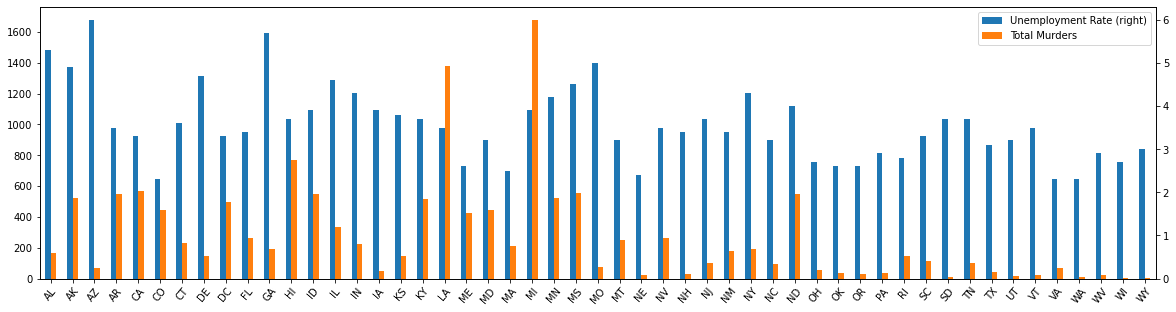

<Figure size 432x288 with 0 Axes>

In [10]:
multi_plot = unemploy_multibar_df.plot(kind="bar", secondary_y = ['Unemployment Rate'], figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(unemploy_multibar_df['Abbreviations'], rotation=50)
#plt.yaxis.set_major_formatter(ticker.PercentFormatter(xmax)

plt.show()
plt.tight_layout()

In [11]:
# BONUS: Generate the correlation matrix and find the strongest positive and negative correlations

hm_corr = data_df.corr()
hm_corr.unstack().sort_values()

hm_corr

,Total Population,Median Income,Median Home Value,Unemployment Rate,Poverty Rate,Total Murders,Homicide Rate
Total Population,1.000000,0.011151,0.169137,0.042558,0.060073,0.847571,-0.074669
Median Income,0.011151,1.000000,0.702282,-0.192988,-0.791572,-0.015007,0.048781
Median Home Value,0.169137,0.702282,1.000000,-0.024518,-0.453434,0.079397,0.142964
Unemployment Rate,0.042558,-0.192988,-0.024518,1.000000,0.525072,0.153039,0.502469
Poverty Rate,0.060073,-0.791572,-0.453434,0.525072,1.000000,0.178898,0.388352
Total Murders,0.847571,-0.015007,0.079397,0.153039,0.178898,1.000000,0.233241
Homicide Rate,-0.074669,0.048781,0.142964,0.502469,0.388352,0.233241,1.000000


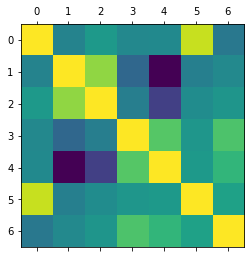

In [12]:
# correlation map for fun

plt.matshow(data_df.corr())
plt.show()